In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
#warnings.filterwarnings('default')

# Load data

In [2]:
df = pd.read_csv('./shooter-data/shooter-s1.csv')
df.head()

,subject,age,stimulus,trial,target,object,rt,response
0,1,35,w05,19,white,nogun,658,correct
1,1,35,w15,20,white,nogun,622,correct
2,1,35,b92,21,black,nogun,639,correct
3,1,35,w11,22,white,nogun,494,correct
4,1,35,b93,23,black,nogun,562,correct


In [3]:
# gather the names of all the data files
files = glob.glob('./shooter-data/shooter-s*.csv')

# place to keep the subjects' data frames
data_frames = []

# loop over files
for file in files:
    # read in the data and add it to the list
    data_frames.append(pd.read_csv(file, sep=',', index_col=False))

# merge all the data into a single dataframe
df = pd.concat(data_frames, ignore_index=True)

In [4]:
df.head()

,subject,age,stimulus,trial,target,object,rt,response
0,34,19,w94,19,white,gun,451,correct
1,34,19,b12,20,black,gun,492,correct
2,34,19,w90,21,white,nogun,636,correct
3,34,19,w97,22,white,nogun,636,correct
4,34,19,b16,23,black,gun,529,correct


In [5]:
df.dtypes

subject      int64
age          int64
stimulus    object
trial        int64
target      object
object      object
rt           int64
response    object
dtype: object

# Rename columns

In [6]:
df.rename({'target' : 'race', 'object' : 'gun', 'response' : 'correct'}, axis='columns', inplace=True)
df.head()

,subject,age,stimulus,trial,race,gun,rt,correct
0,34,19,w94,19,white,gun,451,correct
1,34,19,b12,20,black,gun,492,correct
2,34,19,w90,21,white,nogun,636,correct
3,34,19,w97,22,white,nogun,636,correct
4,34,19,b16,23,black,gun,529,correct


# Replace the string codings for correct, race, and gun with integers

In [7]:
df.replace({'race': {'white' : 0, 'black' : 1}}, inplace=True)
df.replace({'correct': {'incorrect' : 0, 'correct' : 1}}, inplace=True)
df.replace({'gun': {'nogun' : 0, 'gun' : 1}}, inplace=True)

df.head()

,subject,age,stimulus,trial,race,gun,rt,correct
0,34,19,w94,19,0,1,451,1
1,34,19,b12,20,1,1,492,1
2,34,19,w90,21,0,0,636,1
3,34,19,w97,22,0,0,636,1
4,34,19,b16,23,1,1,529,1


In [8]:
df.groupby('subject').mean()[0:9]

,age,trial,race,gun,rt,correct
subject,,,,,,
1,35.0,68.5,0.5,0.5,588.70,0.97
2,35.0,68.5,0.5,0.5,609.34,0.97
3,34.0,68.5,0.5,0.5,578.52,0.97
4,34.0,68.5,0.5,0.5,575.10,1.00
5,33.0,68.5,0.5,0.5,579.43,0.93
6,33.0,68.5,0.5,0.5,577.18,0.97
7,32.0,68.5,0.5,0.5,587.96,0.95
8,32.0,68.5,0.5,0.5,622.74,0.98
9,31.0,68.5,0.5,0.5,559.64,0.85


In [9]:
# least accurate subjects
df[['subject', 'rt', 'correct']].groupby('subject').mean().sort_values(by='correct', ascending=True)[:9]

,rt,correct
subject,,
9,559.64,0.85
30,597.07,0.87
18,591.60,0.88
12,616.38,0.90
27,561.75,0.92
20,621.93,0.92
10,591.41,0.92
5,579.43,0.93
24,603.17,0.93


In [10]:
# fastest subjects
df[['subject', 'rt', 'correct']].groupby('subject').mean().sort_values(by='rt', ascending=True)[:9]

,rt,correct
subject,,
33,536.44,0.94
16,545.42,0.93
31,553.33,0.95
25,557.81,0.95
32,557.98,0.97
9,559.64,0.85
28,560.95,0.99
26,561.55,0.95
27,561.75,0.92


(array([  98.,    0.,    0.,    0.,   65.,  519., 1205., 1028.,  491.,
         194.]),
 array([  0. ,  84.9, 169.8, 254.7, 339.6, 424.5, 509.4, 594.3, 679.2,
        764.1, 849. ]),
 <a list of 10 Patch objects>)

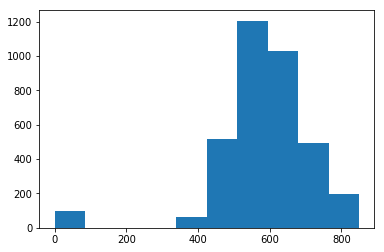

In [11]:
# note that this is the distribution of all subjects'/all trials' RTs
plt.hist(df['rt'])

In [12]:
df['rt'].min()

0

In [13]:
df['rt'].value_counts()[:9]

0      98
551    25
591    24
592    22
583    21
593    21
573    20
569    20
602    20
Name: rt, dtype: int64

### So it looks like we have some RTs of zero.  We ask our student/collaborator and are told these are 'non-reponses' (too slow).

In [14]:
# let's eliminate trials where rt == 0
df.drop(df[df.rt == 0].index, inplace=True)

(array([ 22., 129., 322., 601., 761., 700., 437., 273., 164.,  93.]),
 array([349., 399., 449., 499., 549., 599., 649., 699., 749., 799., 849.]),
 <a list of 10 Patch objects>)

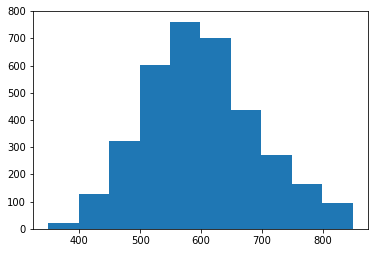

In [15]:
plt.hist(df['rt'])

Much better!

In [ ]:
# if we wanted to drop fast and slow RTs, we could do something like this
df = df.drop(df[ (df.rt == 0) | (df.rt > 1500) ].index)

(array([282., 583., 868., 828., 510., 245., 124.,  42.,  12.,   8.]),
 array([1.1778563 , 1.34660362, 1.51535094, 1.68409826, 1.85284559,
        2.02159291, 2.19034023, 2.35908755, 2.52783487, 2.69658219,
        2.86532951]),
 <a list of 10 Patch objects>)

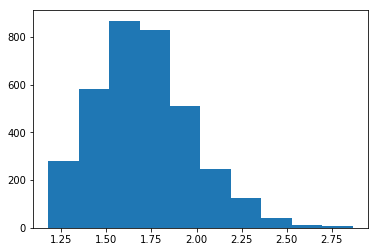

In [16]:
# transform RT and place in a new column
df['rate'] = 1000.0/df['rt']
#df['rate'] = np.log(df['rt'])
plt.hist(df['rate'])

In [17]:
sub_means = df[['subject','correct', 'rt']].groupby('subject').mean()

(array([2., 0., 2., 1., 2., 2., 6., 9., 8., 4.]),
 array([0.90425532, 0.91382979, 0.92340426, 0.93297872, 0.94255319,
        0.95212766, 0.96170213, 0.9712766 , 0.98085106, 0.99042553,
        1.        ]),
 <a list of 10 Patch objects>)

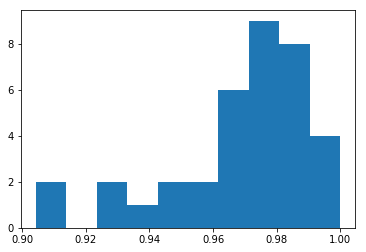

In [18]:
plt.hist(sub_means['correct'])

(array([1., 2., 4., 4., 4., 7., 3., 3., 3., 5.]),
 array([541.85858586, 552.45710227, 563.05561869, 573.6541351 ,
        584.25265152, 594.85116793, 605.44968434, 616.04820076,
        626.64671717, 637.24523359, 647.84375   ]),
 <a list of 10 Patch objects>)

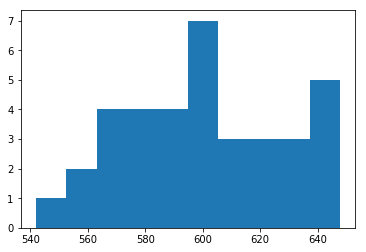

In [19]:
plt.hist(sub_means['rt'])

Text(0,0.5,'p(correct)')

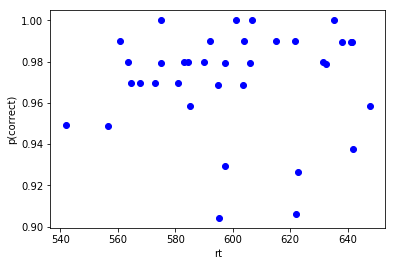

In [20]:
plt.plot(sub_means['rt'], sub_means['correct'], 'bo')
plt.xlabel('rt')
plt.ylabel('p(correct)')

## Save wrangled data

In [21]:
df.to_csv('./shooter-data/shooter-group.csv', index=False)

## Visualize

(530, 660)

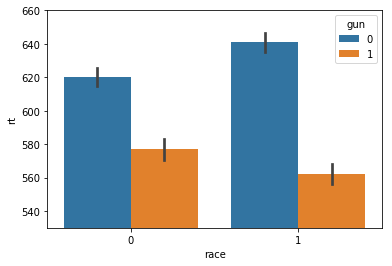

In [22]:
sns.barplot(x='race', y='rt', hue='gun', data=df)
plt.ylim(530, 660)

(0.94, 1)

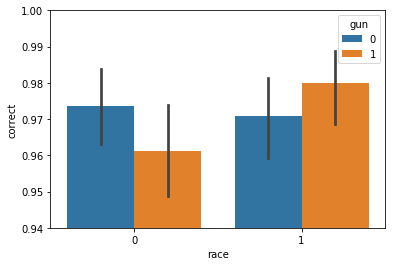

In [23]:
sns.barplot(x='race', y='correct', hue='gun', data=df)
plt.ylim(.94, 1)